# Task - 4

## 1. Basic Pandas Operations

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset and display the head. You will get the output as mentioned below

df=pd.read_csv('train.csv')
df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [3]:
# Check the shape of the dataframe

df.shape

(10000, 15)

In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

## 2. Cleaning the Data

In [5]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

df['Health Indicator'].fillna(df['Health Indicator'].mode()[0],axis=0,inplace=True)
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0],axis=0,inplace=True)
df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mode()[0],axis=0,inplace=True)

In [6]:
# Check again Holding_Policy_Duration is in object column convert that into int

df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].apply(lambda x: str(15) if x=='14+' else x)
df['Holding_Policy_Duration']=pd.to_numeric(df['Holding_Policy_Duration'])
df['Holding_Policy_Duration'].dtype

dtype('int64')

In [7]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No


df[['Accomodation_Type','Reco_Insurance_Type','Is_Spouse']].nunique()

Accomodation_Type      2
Reco_Insurance_Type    2
Is_Spouse              2
dtype: int64

In [8]:
# Converting all the Yes to 1 and No to 0. 
# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0


df['Accomodation_Type']=df['Accomodation_Type'].apply(lambda x:1 if x=='Owned' else 0)
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].apply(lambda x:1 if x=='Individual' else 0)
df['Is_Spouse']=df['Is_Spouse'].apply(lambda x:1 if x=='Yes' else 0)

In [9]:
# Now again having a look at all those columns to see if everything went well

# Observe that all those columns are now converted from Object to Int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  int64  
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [10]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df[['City_Code','Health Indicator']].nunique()

City_Code           36
Health Indicator     9
dtype: int64

In [11]:
# Lets just try to see what is happening Response. Check the output.

df['Response']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Response, Length: 10000, dtype: int64

In [12]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape


df.drop('Unnamed: 0',axis=1,inplace=True)

df.shape

(10000, 14)

In [13]:
# Getting all the Object Dtypes

df.select_dtypes(include='object').columns

Index(['City_Code', 'Health Indicator'], dtype='object')

In [14]:
# Encoding the categorical features



# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

from sklearn.preprocessing import OneHotEncoder

OHE=OneHotEncoder(handle_unknown='ignore')
one_hot_encoded=OHE.fit_transform(df[['Health Indicator']])

df_encoded=pd.DataFrame(one_hot_encoded.toarray(),columns=sorted(df['Health Indicator'].unique().tolist()))

In [15]:
# Concatinating the original data frame and onehot encoded dataframe

final_df=df.join(df_encoded)

In [16]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe


final_df.drop(['ID','Health Indicator','X9'],axis=1,inplace=True)

In [17]:
final_df

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,X1,X2,X3,X4,X5,X6,X7,X8
0,C3,64,1,1,36,36,0,15,2.0,16,13320.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C3,2955,1,1,66,66,0,10,1.0,19,16152.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,C1,1542,0,1,24,24,0,3,1.0,16,7310.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C26,772,0,1,75,75,0,1,3.0,16,15792.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C2,1510,1,0,59,58,1,15,4.0,17,23673.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,C3,13,1,0,47,40,1,15,3.0,19,27840.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9996,C5,1477,0,1,34,34,0,6,1.0,4,10560.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,C1,2357,1,1,64,64,0,8,2.0,19,14716.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,C1,1443,0,1,53,53,0,15,3.0,13,11664.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Perform Exploratory Data Analysis

**To Do:**
1. Perform Univaraite Analysis (Basic pandas statistical description)
2. Perform Bivaraite Analysis (Pandas Cross Tabs)
3. Visualisations - 
    * Univariate - Histograms, boxplot, PDFs, countplot, etc
    * Bivariate - Scatterplot, Boxplots, Pairplot, etc
4. Write proper observations after each plot
5. At the end of the notebook, summarize it with all the best observations you got.

### City Code
#### Lets see the number of cities and see how many customers are there

In [18]:
print('no of cities in the dataframe : ',final_df['City_Code'].nunique())
print()
final_df['City_Code'].value_counts()

no of cities in the dataframe :  36



C1     1796
C2     1505
C3      966
C4      727
C9      428
C7      390
C8      371
C6      361
C10     335
C5      264
C15     239
C11     231
C16     219
C17     211
C13     193
C20     179
C12     168
C19     168
C14     153
C21     136
C24     129
C18     127
C23     123
C22     102
C26      89
C29      71
C25      66
C27      57
C33      54
C28      47
C32      39
C34      25
C36      12
C30      12
C31       4
C35       3
Name: City_Code, dtype: int64

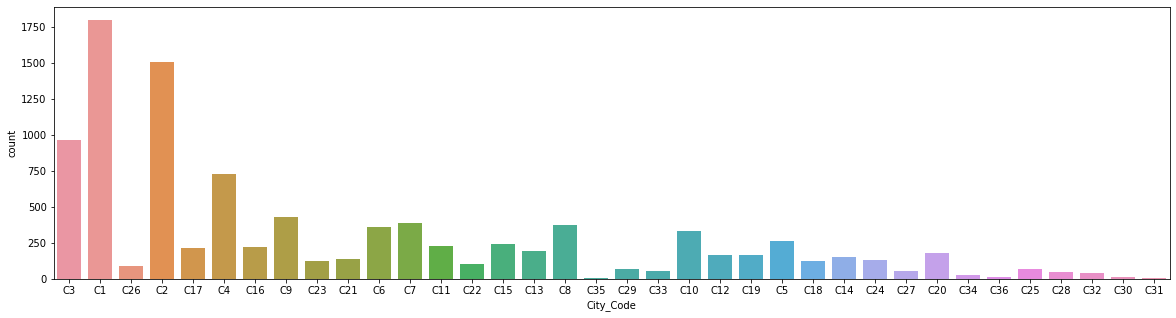

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(final_df['City_Code'])
plt.show()

#### Let's see city-wise customers interests in recommended policy

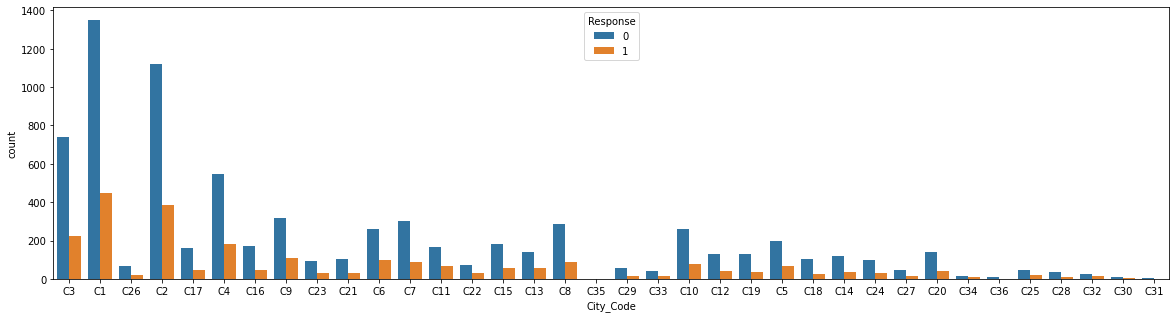

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(final_df['City_Code'],hue=final_df['Response'])
plt.show()

### Region Code
#### Let's see the number of regions and region-wise customer interests in recommended policy.

In [21]:
print('no of Regions in the dataframe : ',final_df['Region_Code'].nunique())
print()
final_df['Region_Code'].value_counts()

no of Regions in the dataframe :  3726



1       23
6       18
4       18
7       17
30      15
        ..
3233     1
2765     1
2151     1
5170     1
714      1
Name: Region_Code, Length: 3726, dtype: int64

### Accomodation Type
#### Let's see how many customers are living in their own house or rented houseand see how their interests vary in recommended policy.

In [22]:
final_df['Accomodation_Type'].value_counts()   # here 1 means Owned house and 0 means Rented House

1    5509
0    4491
Name: Accomodation_Type, dtype: int64

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

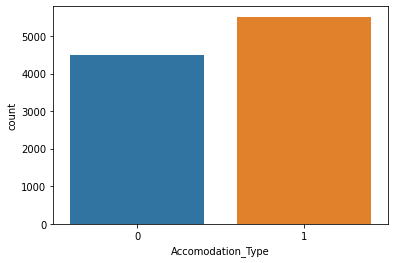

In [23]:
sns.countplot(final_df['Accomodation_Type'])

In [24]:
pd.crosstab(final_df['Accomodation_Type'],final_df['Response'])

Response,0,1
Accomodation_Type,,
0,3423,1068
1,4118,1391


<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

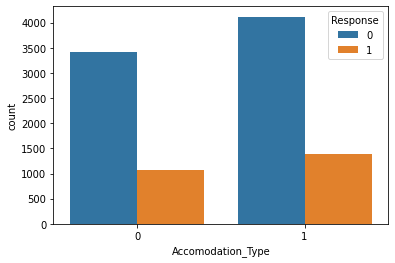

In [25]:
sns.countplot(final_df['Accomodation_Type'],hue=final_df['Response'])

#### Let's see the city-wise accomodation type and customer response

In [26]:
pd.crosstab(final_df['Response'],columns=[final_df['City_Code'],final_df['Accomodation_Type']]).T

Response                       0    1
City_Code Accomodation_Type          
C1        0                  442  141
          1                  908  305
C10       0                  151   48
          1                  107   29
C11       0                   81   31
...                          ...  ...
C7        1                  214   66
C8        0                  138   45
          1                  147   41
C9        0                  162   55
          1                  156   55

[72 rows x 2 columns]

<AxesSubplot:xlabel='City_Code,Accomodation_Type'>

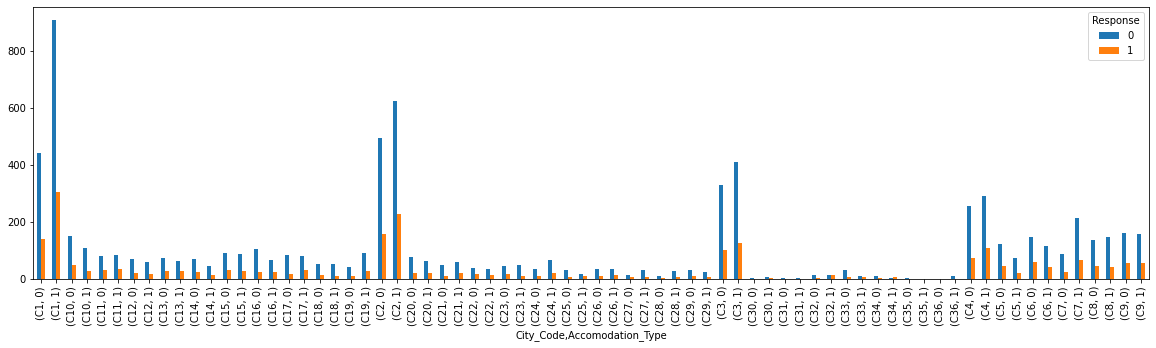

In [27]:
pd.crosstab(final_df['Response'],columns=[final_df['City_Code'],final_df['Accomodation_Type']]).T.plot(kind='bar',figsize=(20,5))

### Reco Insurance Type
#### Let's see the various recommended insurance types and customer response to them.

In [28]:
pd.crosstab(final_df['Reco_Insurance_Type'],final_df['Response'])

Response,0,1
Reco_Insurance_Type,,
0,1509,535
1,6032,1924


<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

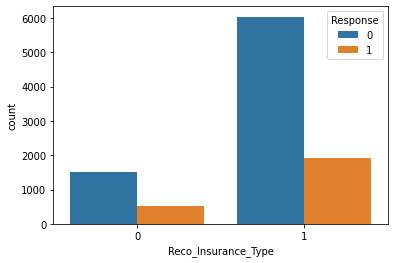

In [29]:
sns.countplot(final_df['Reco_Insurance_Type'],hue=final_df['Response'])

#### Let's see customers accommodation, recommended insurance type and customer responses.

In [30]:
pd.crosstab(index=[final_df['Accomodation_Type'],final_df['Reco_Insurance_Type']],columns=final_df['Response'])

Response                                  0    1
Accomodation_Type Reco_Insurance_Type           
0                 0                     380  139
                  1                    3043  929
1                 0                    1129  396
                  1                    2989  995

<AxesSubplot:xlabel='Accomodation_Type,Reco_Insurance_Type'>

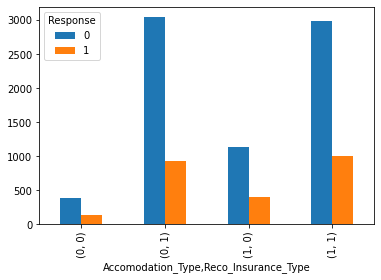

In [31]:
pd.crosstab(index=[final_df['Accomodation_Type'],final_df['Reco_Insurance_Type']],columns=final_df['Response']).plot(kind='bar')

### Recommended Policy Category
#### Let's see how many categories under the type of recommended policies.

In [32]:
print('Number of Recommended Policy Categories : ',final_df['Reco_Policy_Cat'].nunique())

Number of Recommended Policy Categories :  22


In [33]:
final_df['Reco_Policy_Cat'].unique()

array([16, 19, 17, 21,  9, 18, 13, 15, 14, 22, 20,  5, 12,  6,  4,  1,  3,
       11,  8,  2,  7, 10], dtype=int64)

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='count'>

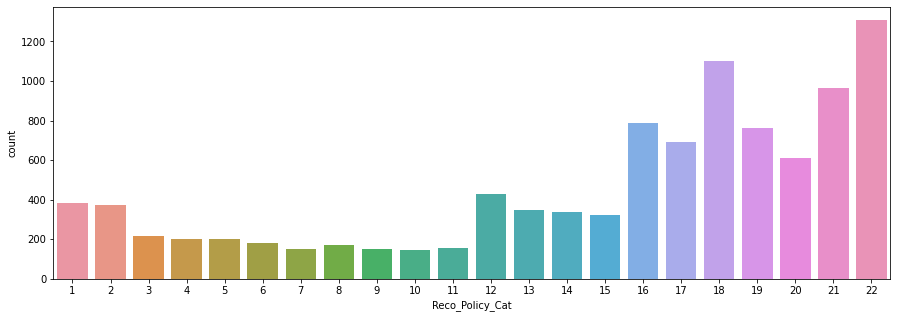

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(final_df['Reco_Policy_Cat'])

### Recommended Policy Premium
#### Let's see if there is a relationship between the recommended policy premium and recommended policy category.Analyse results with customer's holding policy type and their response to recommended policy.

In [35]:
avg_premium=final_df.groupby(final_df['Reco_Policy_Cat'])[['Reco_Policy_Premium']].mean()
avg_premium

,Reco_Policy_Premium
Reco_Policy_Cat,
1,12915.944357
2,13231.982306
3,15390.644240
4,12157.566000
5,16142.542157
6,13193.164444
7,15231.881046
8,14319.471765
9,13699.385333


<AxesSubplot:xlabel='Reco_Policy_Cat'>

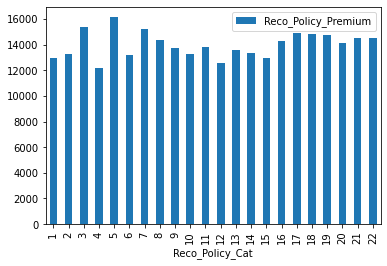

In [36]:
avg_premium.plot(kind='bar')

Text(0, 0.5, 'Average Recommended plocy premium')

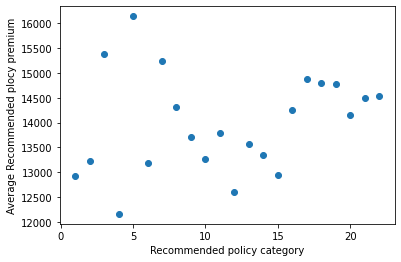

In [37]:
plt.scatter(avg_premium.index,avg_premium.values)
plt.xlabel('Recommended policy category')
plt.ylabel('Average Recommended plocy premium')

<AxesSubplot:xlabel='Reco_Policy_Cat'>

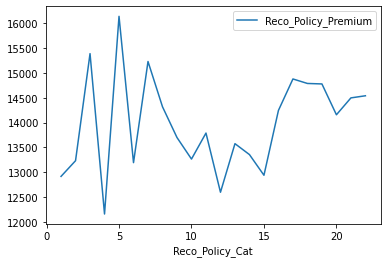

In [38]:
avg_premium.plot(kind='line')

In [39]:
pd.crosstab(final_df['Holding_Policy_Type'],final_df['Response'])

Response,0,1
Holding_Policy_Type,,
1.0,1212,390
2.0,730,243
3.0,5037,1590
4.0,562,236


<AxesSubplot:xlabel='Holding_Policy_Type'>

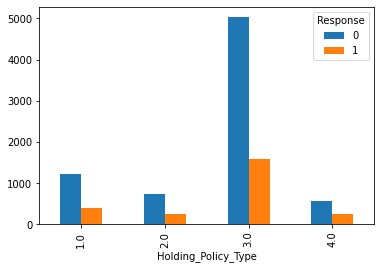

In [40]:
pd.crosstab(final_df['Holding_Policy_Type'],final_df['Response']).plot(kind='bar')

#### Let's see which type of recommnded policy has more number of customers

In [41]:
final_df['Reco_Policy_Cat'].value_counts()

22    1308
18    1102
21     966
16     786
19     764
17     694
20     612
12     431
1      381
2      373
13     348
14     336
15     323
3      217
5      204
4      200
6      180
8      170
11     155
7      153
9      150
10     147
Name: Reco_Policy_Cat, dtype: int64

In [42]:
print('Recommended policy category {} has more number of customers with {}'.format(final_df['Reco_Policy_Cat'].value_counts().idxmax(),final_df['Reco_Policy_Cat'].value_counts().max()))

Recommended policy category 22 has more number of customers with 1308


In [43]:
pd.crosstab(final_df['Reco_Policy_Cat'],final_df['Response'])

Response,0,1
Reco_Policy_Cat,,
1,378,3
2,324,49
3,173,44
4,182,18
5,150,54
6,154,26
7,123,30
8,137,33
9,123,27


<AxesSubplot:xlabel='Reco_Policy_Cat'>

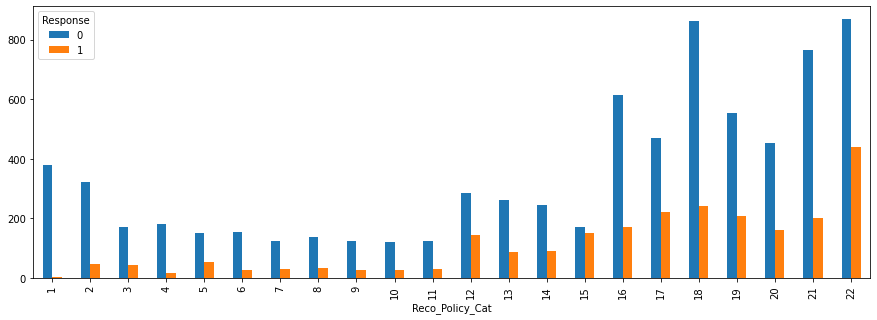

In [44]:
pd.crosstab(final_df['Reco_Policy_Cat'],final_df['Response']).plot(kind='bar',figsize=(15,5))

#### Let's see city-wise recommended insurance types to customers and theirresponses to recommended policy.

In [45]:
pd.crosstab(index=[final_df['City_Code'],final_df['Reco_Insurance_Type']],columns=final_df['Response'])

Response                         0    1
City_Code Reco_Insurance_Type          
C1        0                    354  116
          1                    996  330
C10       0                     37   25
          1                    221   52
C11       0                     39   12
...                            ...  ...
C7        1                    220   60
C8        0                     60   12
          1                    225   74
C9        0                     52   21
          1                    266   89

[71 rows x 2 columns]

<AxesSubplot:xlabel='City_Code,Reco_Insurance_Type'>

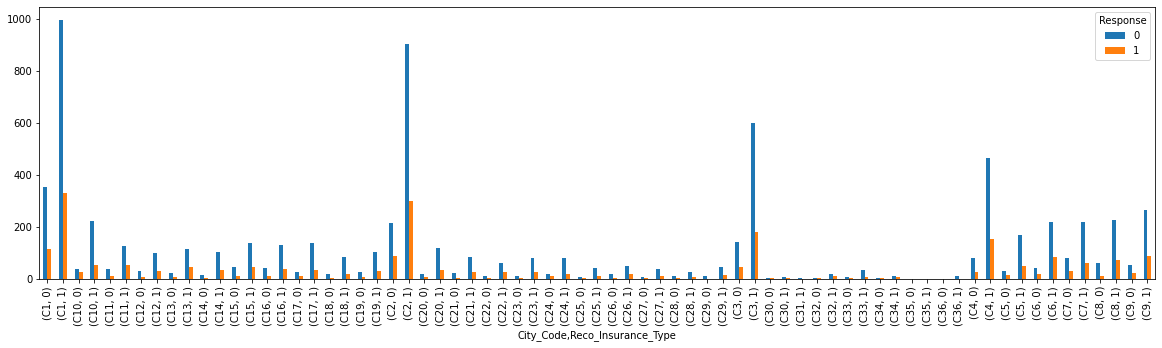

In [46]:
pd.crosstab(columns=final_df['Response'],index=[final_df['City_Code'],final_df['Reco_Insurance_Type']]).plot(kind='bar',figsize=(20,5))

#### Let's analyze the customer's upper age with their type of accommodation and recommended policy types to them and also their interest in the recommended policy.


In [47]:
pd.crosstab(final_df['Accomodation_Type'],final_df['Upper_Age'])

Upper_Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
Accomodation_Type,,,,,,,,,,,,,,,,,,,,,
0,24,101,129,221,240,247,252,240,201,173,...,32,24,26,23,28,16,25,17,15,109
1,5,12,21,31,56,59,64,70,88,79,...,106,109,80,97,106,102,74,85,70,441


<AxesSubplot:xlabel='Upper_Age', ylabel='count'>

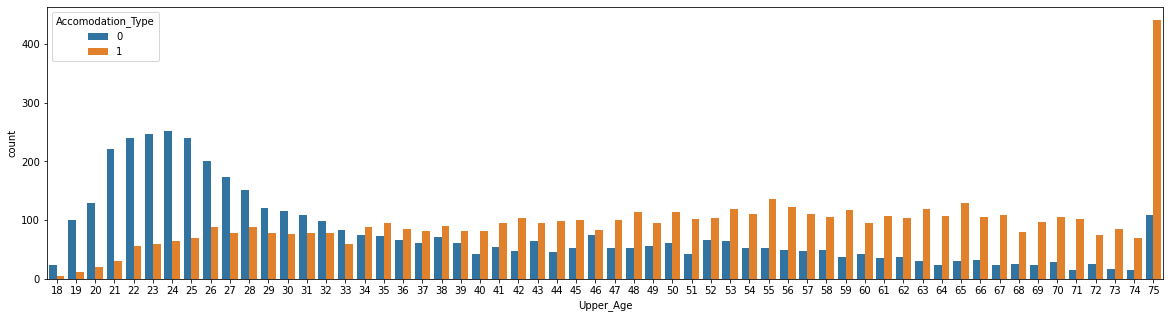

In [48]:
plt.figure(figsize=(20,5))
sns.countplot(final_df['Upper_Age'],hue=final_df['Accomodation_Type'])

In [49]:
pd.crosstab(final_df['Reco_Policy_Cat'],final_df['Upper_Age'])

Upper_Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
Reco_Policy_Cat,,,,,,,,,,,,,,,,,,,,,
1,0,2,7,8,10,16,12,9,6,14,...,2,4,1,2,4,2,2,3,2,18
2,8,5,5,9,11,16,11,9,10,6,...,3,1,1,2,6,1,3,1,1,16
3,0,0,4,5,5,9,4,8,2,4,...,1,5,3,5,0,0,4,1,7,14
4,0,2,3,10,12,5,9,10,8,2,...,2,1,2,3,1,1,0,2,1,4
5,0,2,0,1,1,5,6,7,3,8,...,3,4,4,5,5,7,0,5,3,21
6,0,6,5,9,6,6,8,3,4,2,...,0,1,1,1,0,4,0,2,1,8
7,0,2,0,1,6,5,3,3,5,2,...,5,7,2,1,1,2,4,3,6,12
8,0,0,5,3,9,8,4,5,5,3,...,4,2,4,2,3,4,0,0,2,10
9,0,0,3,4,5,5,6,4,4,7,...,2,1,1,2,1,0,2,1,1,4


In [50]:
pd.crosstab(final_df['Response'],final_df['Upper_Age'])

Upper_Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,69,70,71,72,73,74,75
Response,,,,,,,,,,,,,,,,,,,,,
0,24,91,116,192,232,240,243,230,217,189,...,96,103,80,82,97,88,81,73,74,413
1,5,22,34,60,64,66,73,80,72,63,...,42,30,26,38,37,30,18,29,11,137


<AxesSubplot:xlabel='Upper_Age', ylabel='count'>

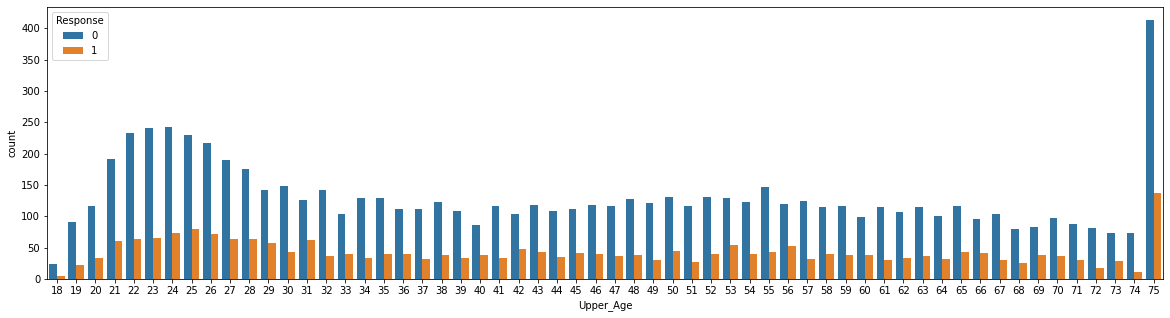

In [51]:
plt.figure(figsize=(20,5))
sns.countplot(final_df['Upper_Age'],hue=final_df['Response'])

#### Let's see city-wise the customers who have recommended to take the joint policy with their spouse or with other customers. Check these results with the customer's type of accommodation.

In [52]:
final_df[final_df['Reco_Insurance_Type']==0]['City_Code'].value_counts()

C1     470
C2     301
C3     189
C4     110
C7     110
C9      73
C8      72
C10     62
C6      58
C15     56
C16     51
C11     51
C5      45
C17     38
C12     36
C19     35
C13     30
C24     29
C20     27
C21     24
C18     24
C26     22
C14     18
C23     17
C22     16
C28     15
C25     12
C33     11
C29     11
C27      9
C32      9
C34      7
C30      4
C36      1
C35      1
Name: City_Code, dtype: int64

In [53]:
pd.crosstab(final_df[final_df['Reco_Insurance_Type']==0]['Response'],final_df[final_df['Reco_Insurance_Type']==0]['City_Code'])

City_Code,C1,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,C33,C34,C35,C36,C4,C5,C6,C7,C8,C9
Response,,,,,,,,,,,,,,,,,,,,,
0,354,37,39,29,22,15,44,40,26,19,...,7,4,1,0,82,30,41,81,60,52
1,116,25,12,7,8,3,12,11,12,5,...,4,3,0,1,28,15,17,29,12,21


<AxesSubplot:xlabel='City_Code'>

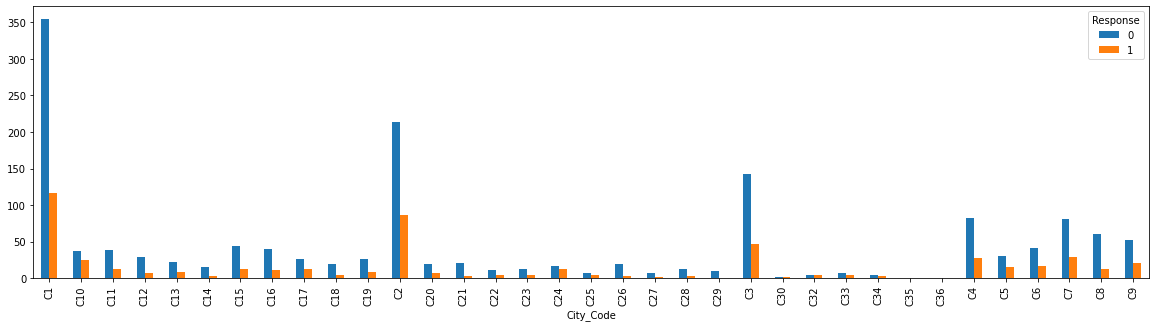

In [54]:
pd.crosstab(final_df[final_df['Reco_Insurance_Type']==0]['City_Code'],
            final_df[final_df['Reco_Insurance_Type']==0]['Response']).plot(kind='bar',figsize=(20,5))

## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [55]:
final_df['Response'].value_counts()

0    7541
1    2459
Name: Response, dtype: int64

In [56]:
from imblearn.under_sampling import RandomUnderSampler

In [57]:
sampler=RandomUnderSampler()

In [58]:
X=final_df.drop('Response',axis=1)
y=final_df['Response']

In [59]:
print(X.shape,y.shape)

(10000, 19) (10000,)


In [60]:
predictor,response=sampler.fit_resample(X,y)

In [61]:
print(predictor.shape,response.shape)

(4918, 19) (4918,)


## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [62]:
predictor.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,X1,X2,X3,X4,X5,X6,X7,X8
0,C3,569,0,1,50,50,0,15,3.0,9,12960.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C1,1489,0,1,34,34,0,15,3.0,19,6330.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,C9,223,1,1,36,36,0,2,4.0,21,12804.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C2,3510,1,1,58,58,0,7,3.0,3,16008.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C3,2116,0,1,22,22,0,15,3.0,18,5448.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
predictor['Holding_Policy_Type']=predictor['Holding_Policy_Type'].astype('category')
predictor['Reco_Policy_Cat']=predictor['Reco_Policy_Cat'].astype('category')

In [64]:
predictor=pd.concat([predictor,pd.get_dummies(predictor[['City_Code','Holding_Policy_Type','Reco_Policy_Cat']],drop_first=True)],axis=1)

In [65]:
predictor.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,C3,569,0,1,50,50,0,15,3.0,9,...,0,0,0,0,0,0,0,0,0,0
1,C1,1489,0,1,34,34,0,15,3.0,19,...,0,0,0,0,0,0,1,0,0,0
2,C9,223,1,1,36,36,0,2,4.0,21,...,0,0,0,0,0,0,0,0,1,0
3,C2,3510,1,1,58,58,0,7,3.0,3,...,0,0,0,0,0,0,0,0,0,0
4,C3,2116,0,1,22,22,0,15,3.0,18,...,0,0,0,0,0,1,0,0,0,0


In [66]:
predictor.drop(['City_Code','Region_Code','Holding_Policy_Type','Reco_Policy_Cat'],axis=1,inplace=True)

In [67]:
predictor.shape

(4918, 74)

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()

In [70]:
predictor['Upper_Age']=scaler.fit_transform(predictor[['Upper_Age']])
predictor['Lower_Age']=scaler.fit_transform(predictor[['Lower_Age']])
predictor['Holding_Policy_Duration']=scaler.fit_transform(predictor[['Holding_Policy_Duration']])
predictor['Reco_Policy_Premium']=scaler.fit_transform(predictor[['Reco_Policy_Premium']])

In [71]:
predictor

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Reco_Policy_Premium,X1,X2,X3,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,0,1,0.307847,0.440793,0,0.917157,-0.195803,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,-0.621231,-0.487585,0,0.917157,-1.208885,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,-0.505096,-0.371537,0,-1.389137,-0.219640,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0.772385,0.904982,0,-0.502101,0.269940,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,-1.318039,-1.183868,0,0.917157,-1.343657,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,1,1,1.411126,1.543241,0,0.739750,1.330697,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4914,1,1,-0.621231,-0.487585,0,-0.856915,-0.428063,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4915,0,1,-1.259971,-1.125844,0,0.917157,-1.605867,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4916,0,1,0.249779,0.382769,0,-0.502101,-0.074783,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(predictor,response,test_size=0.2)

In [74]:
print(x_train.shape,x_test.shape)

(3934, 74) (984, 74)


In [75]:
print(y_train.shape,y_test.shape)

(3934,) (984,)


## Model Building - Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Train the Model using `Accuracy` as the evaluation metric
2. Predict
3. Evaluate use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
4. Compare the perormance of all the models

In [76]:
performance_metrics_with_default_parameters=pd.DataFrame(index=['Accuracy','Precision','Recall','F1_score','AUC'])

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(max_iter=10000)

In [78]:
LR_model.fit(x_train,y_train)
print('Training Accuracy : ',LR_model.score(x_train,y_train))

Training Accuracy :  0.5955770208439247


In [79]:
y_pred=LR_model.predict(x_test)
print('Testing Accuracy : ',LR_model.score(x_test,y_test))

Testing Accuracy :  0.5670731707317073


In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score

In [81]:
confusion_matrix(y_test,y_pred)

array([[292, 201],
       [225, 266]], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.59      0.58       493
           1       0.57      0.54      0.56       491

    accuracy                           0.57       984
   macro avg       0.57      0.57      0.57       984
weighted avg       0.57      0.57      0.57       984


Accuracy is :  0.5670731707317073
Precission :  0.569593147751606
Recall :  0.5417515274949084
f1-score :  0.5553235908141962
Roc Auc score :  0.5670218083722006


In [83]:
y_pred_proba = LR_model.predict_proba(x_test)[:,1]

In [84]:
from sklearn.metrics import roc_curve,auc
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.6062016912952413


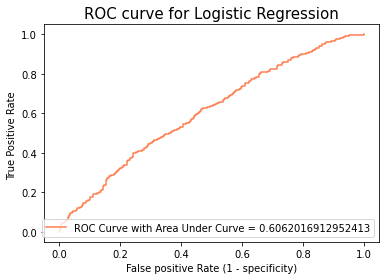

In [85]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [86]:
performance_metrics_with_default_parameters['Logistic Regression']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# SVM

In [87]:
from sklearn.svm import SVC
svm_model=SVC(probability=True)

In [88]:
svm_model.fit(x_train,y_train)
print('Training Accuracy : ',svm_model.score(x_train,y_train))

Training Accuracy :  0.6832740213523132


In [89]:
y_pred=svm_model.predict(x_test)
print('Testing Accuracy : ',svm_model.score(x_test,y_test))

Testing Accuracy :  0.5721544715447154


In [90]:
confusion_matrix(y_test,y_pred)

array([[282, 211],
       [210, 281]], dtype=int64)

In [91]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57       493
           1       0.57      0.57      0.57       491

    accuracy                           0.57       984
   macro avg       0.57      0.57      0.57       984
weighted avg       0.57      0.57      0.57       984


Accuracy is :  0.5721544715447154
Precission :  0.5711382113821138
Recall :  0.5723014256619144
f1-score :  0.5717192268565615
Roc Auc score :  0.5721547696260891


In [92]:
y_pred_proba = svm_model.predict_proba(x_test)[:,1]

In [93]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5985693806984131


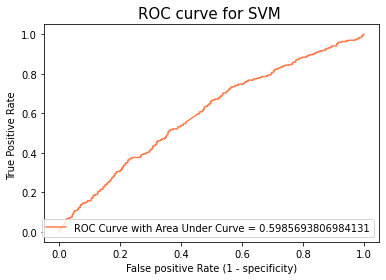

In [94]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for SVM ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [95]:
performance_metrics_with_default_parameters['SVM']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# KNN 

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

In [97]:
knn_model.fit(x_train,y_train)
print('Training Accuracy : ',knn_model.score(x_train,y_train))

Training Accuracy :  0.6898830706659889


In [98]:
y_pred=knn_model.predict(x_test)
print('Testing Accuracy : ',knn_model.score(x_test,y_test))

Testing Accuracy :  0.5142276422764228


In [99]:
confusion_matrix(y_test,y_pred)

array([[251, 242],
       [236, 255]], dtype=int64)

In [100]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       493
           1       0.51      0.52      0.52       491

    accuracy                           0.51       984
   macro avg       0.51      0.51      0.51       984
weighted avg       0.51      0.51      0.51       984


Accuracy is :  0.5142276422764228
Precission :  0.5130784708249497
Recall :  0.5193482688391039
f1-score :  0.5161943319838057
Roc Auc score :  0.5142380289428785


In [101]:
y_pred_proba = knn_model.predict_proba(x_test)[:,1]

In [102]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5337040357262366


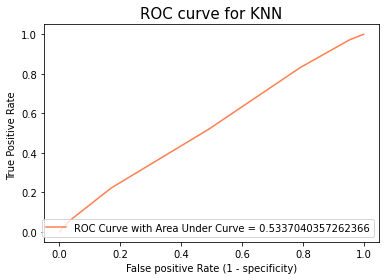

In [103]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [104]:
performance_metrics_with_default_parameters['KNN']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [106]:
dt_model.fit(x_train,y_train)
print('Training Accuracy : ',dt_model.score(x_train,y_train))

Training Accuracy :  1.0


In [107]:
y_pred=dt_model.predict(x_test)
print('Testing Accuracy : ',dt_model.score(x_test,y_test))

Testing Accuracy :  0.5040650406504065


In [108]:
confusion_matrix(y_test,y_pred)

array([[252, 241],
       [247, 244]], dtype=int64)

In [109]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51       493
           1       0.50      0.50      0.50       491

    accuracy                           0.50       984
   macro avg       0.50      0.50      0.50       984
weighted avg       0.50      0.50      0.50       984


Accuracy is :  0.5040650406504065
Precission :  0.5030927835051546
Recall :  0.4969450101832994
f1-score :  0.5
Roc Auc score :  0.5040505983979376


In [110]:
y_pred_proba = dt_model.predict_proba(x_test)[:,1]

In [111]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5040505983979376


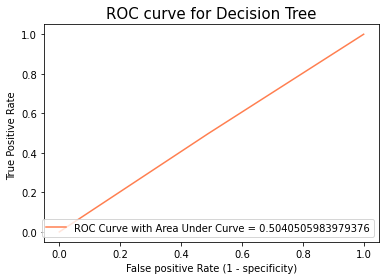

In [112]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [113]:
performance_metrics_with_default_parameters['Decision Tree']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [115]:
rf_model.fit(x_train,y_train)
print('Training Accuracy : ',rf_model.score(x_train,y_train))

Training Accuracy :  1.0


In [116]:
y_pred=rf_model.predict(x_test)
print('Testing Accuracy : ',rf_model.score(x_test,y_test))

Testing Accuracy :  0.5376016260162602


In [117]:
confusion_matrix(y_test,y_pred)

array([[275, 218],
       [237, 254]], dtype=int64)

In [118]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55       493
           1       0.54      0.52      0.53       491

    accuracy                           0.54       984
   macro avg       0.54      0.54      0.54       984
weighted avg       0.54      0.54      0.54       984


Accuracy is :  0.5376016260162602
Precission :  0.538135593220339
Recall :  0.5173116089613035
f1-score :  0.5275181723779854
Roc Auc score :  0.5375604697950533


In [119]:
y_pred_proba = rf_model.predict_proba(x_test)[:,1]

In [120]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5641423926828966


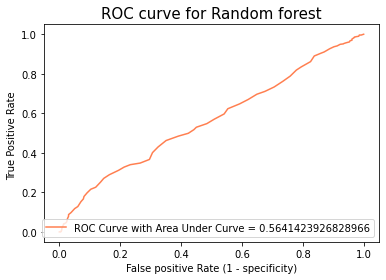

In [121]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Random forest',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [122]:
performance_metrics_with_default_parameters['Random Forest']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Adaboosting

In [123]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()

In [124]:
adaboost.fit(x_train,y_train)
print('Training Accuracy : ',adaboost.score(x_train,y_train))

Training Accuracy :  0.6044738179969497


In [125]:
y_pred=adaboost.predict(x_test)
print('Testing Accuracy : ',adaboost.score(x_test,y_test))

Testing Accuracy :  0.5721544715447154


In [126]:
confusion_matrix(y_test,y_pred)

array([[285, 208],
       [213, 278]], dtype=int64)

In [127]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.58      0.58       493
           1       0.57      0.57      0.57       491

    accuracy                           0.57       984
   macro avg       0.57      0.57      0.57       984
weighted avg       0.57      0.57      0.57       984


Accuracy is :  0.5721544715447154
Precission :  0.5720164609053497
Recall :  0.5661914460285132
f1-score :  0.5690890481064482
Roc Auc score :  0.5721423761582728


In [128]:
y_pred_proba = adaboost.predict_proba(x_test)[:,1]

In [129]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5801155071200472


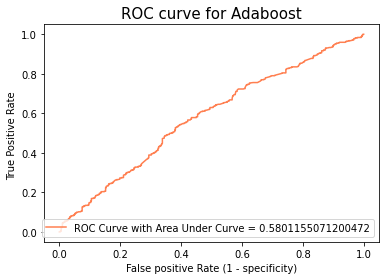

In [130]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Adaboost',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [131]:
performance_metrics_with_default_parameters['Adaboosting']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Gradient Boosting

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()

In [133]:
gb_model.fit(x_train,y_train)
print('Training Accuracy : ',gb_model.score(x_train,y_train))

Training Accuracy :  0.6545500762582613


In [134]:
y_pred=gb_model.predict(x_test)
print('Testing Accuracy : ',gb_model.score(x_test,y_test))

Testing Accuracy :  0.5691056910569106


In [135]:
confusion_matrix(y_test,y_pred)

array([[317, 176],
       [248, 243]], dtype=int64)

In [136]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60       493
           1       0.58      0.49      0.53       491

    accuracy                           0.57       984
   macro avg       0.57      0.57      0.57       984
weighted avg       0.57      0.57      0.57       984


Accuracy is :  0.5691056910569106
Precission :  0.5799522673031027
Recall :  0.49490835030549896
f1-score :  0.5340659340659341
Roc Auc score :  0.5689551893515324


In [137]:
y_pred_proba = gb_model.predict_proba(x_test)[:,1]

In [138]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5971420663215774


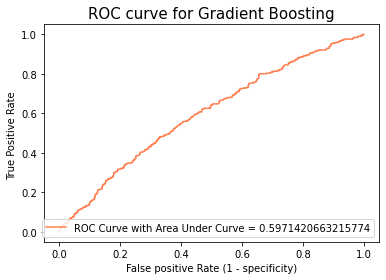

In [139]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient Boosting',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [140]:
performance_metrics_with_default_parameters['Gradient Boosting']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Comparing performance of all models

In [141]:
performance_metrics_with_default_parameters

,Logistic Regression,SVM,KNN,Decision Tree,Random Forest,Adaboosting,Gradient Boosting
Accuracy,0.567073,0.572154,0.514228,0.504065,0.537602,0.572154,0.569106
Precision,0.569593,0.571138,0.513078,0.503093,0.538136,0.572016,0.579952
Recall,0.541752,0.572301,0.519348,0.496945,0.517312,0.566191,0.494908
F1_score,0.555324,0.571719,0.516194,0.500000,0.527518,0.569089,0.534066
AUC,0.606202,0.598569,0.533704,0.504051,0.564142,0.580116,0.597142


## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance


## Model Building - SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
6. Compare the perormance of all the models

# Hyperparamter tuning

In [142]:
performance_metrics_with_hyperparameters=pd.DataFrame(index=['Accuracy','Precision','Recall','F1_score','AUC'])

# Logistic Regression

In [143]:
from sklearn.model_selection import RandomizedSearchCV

In [144]:
h_params={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C':np.linspace(0,1,100)}

In [145]:
rscv=RandomizedSearchCV(estimator=LogisticRegression(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [146]:
results.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.42424242424242425}

In [147]:
results.best_score_

0.569948473645469

## Building Logistic model with hyperparameters

In [148]:
LR_tuned_model=LogisticRegression(max_iter=10000,solver='newton-cg',penalty='l2',C=0.4545454545454546)
LR_tuned_model.fit(x_train,y_train)
y_pred=LR_tuned_model.predict(x_test)
y_pred_proba=LR_tuned_model.predict_proba(x_test)[:,1]

In [149]:
confusion_matrix(y_test,y_pred)

array([[298, 195],
       [231, 260]], dtype=int64)

In [150]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       493
           1       0.57      0.53      0.55       491

    accuracy                           0.57       984
   macro avg       0.57      0.57      0.57       984
weighted avg       0.57      0.57      0.57       984


Accuracy is :  0.5670731707317073
Precission :  0.5714285714285714
Recall :  0.5295315682281059
f1-score :  0.5496828752642706
Roc Auc score :  0.5669970214365682


In [151]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.6023349293365776


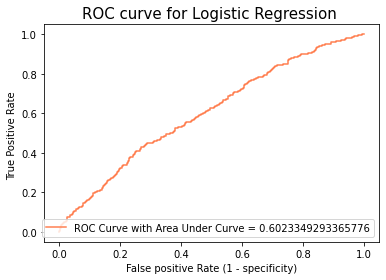

In [152]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Logistic Regression ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [153]:
performance_metrics_with_hyperparameters['Logistic Regression']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# SVM

In [154]:
h_params={'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],'gamma':['scale','auto'],'C':np.linspace(0,1,100)}

In [155]:
rscv=RandomizedSearchCV(estimator=SVC(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [156]:
results.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 0.8484848484848485}

In [157]:
results.best_score_

0.5780831038218827

## Building SVM model with Hyperparameters

In [158]:
svm_tuned_model=SVC(probability=True,kernel='rbf',gamma='auto',C=0.8484848484848485)
svm_tuned_model.fit(x_train,y_train)
y_pred=svm_tuned_model.predict(x_test)
y_pred_proba=svm_tuned_model.predict_proba(x_test)[:,1]

In [159]:
confusion_matrix(y_test,y_pred)

array([[367, 126],
       [294, 197]], dtype=int64)

In [160]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       493
           1       0.61      0.40      0.48       491

    accuracy                           0.57       984
   macro avg       0.58      0.57      0.56       984
weighted avg       0.58      0.57      0.56       984


Accuracy is :  0.573170731707317
Precission :  0.6099071207430341
Recall :  0.40122199592668023
f1-score :  0.48402948402948404
Roc Auc score :  0.5728219513101961


In [161]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5817700350735139


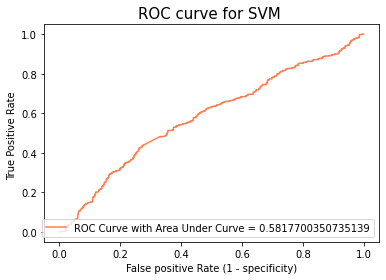

In [162]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for SVM ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [163]:
performance_metrics_with_hyperparameters['SVM']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# KNN

In [164]:
h_params={'n_neighbors':range(1,11,2),'weights':['uniform','distance'],'metric':['minkowski','euclidean','manhattan']}

In [165]:
rscv=RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [166]:
results.best_params_

{'weights': 'distance', 'n_neighbors': 9, 'metric': 'euclidean'}

In [167]:
results.best_score_

0.5372114565499673

## Building knn model with hyperparameters

In [168]:
knn_tuned_model=KNeighborsClassifier(weights='uniform',n_neighbors=7,metric='manhattan')
knn_tuned_model.fit(x_train,y_train)
y_pred=knn_tuned_model.predict(x_test)
y_pred_proba=knn_tuned_model.predict_proba(x_test)[:,1]


confusion_matrix(y_test,y_pred)

array([[261, 232],
       [229, 262]], dtype=int64)

In [169]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       493
           1       0.53      0.53      0.53       491

    accuracy                           0.53       984
   macro avg       0.53      0.53      0.53       984
weighted avg       0.53      0.53      0.53       984


Accuracy is :  0.5315040650406504
Precission :  0.5303643724696356
Recall :  0.5336048879837068
f1-score :  0.5319796954314722
Roc Auc score :  0.5315083263447946


In [170]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5311675059798482


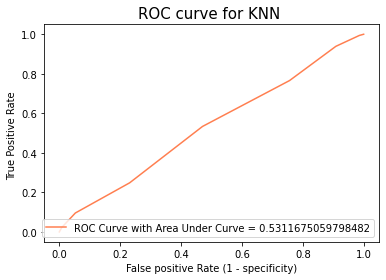

In [171]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for KNN ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [172]:
performance_metrics_with_hyperparameters['KNN']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Decision Tree

In [173]:
h_params={'criterion':["gini", "entropy"],
        'splitter':["best", "random"],
        'max_depth':[1,3,5,7,10,15,20,25,30],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60,70,80,90]}

In [174]:
rscv=RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [175]:
results.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'max_leaf_nodes': 20,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'gini'}

In [176]:
results.best_score_

0.5465695274958854

## Building Decision Tree model with hyperparameters

In [177]:
dt_tuned_model=DecisionTreeClassifier(splitter= 'random',
                                     min_samples_split= 10,
                                     max_leaf_nodes=20,
                                     max_features= 'auto',
                                     max_depth=30,
                                     criterion= 'gini')
dt_tuned_model.fit(x_train,y_train)
y_pred=dt_tuned_model.predict(x_test)
y_pred_proba=dt_tuned_model.predict_proba(x_test)[:,1]


confusion_matrix(y_test,y_pred)

array([[ 59, 434],
       [ 49, 442]], dtype=int64)

In [178]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.12      0.20       493
           1       0.50      0.90      0.65       491

    accuracy                           0.51       984
   macro avg       0.53      0.51      0.42       984
weighted avg       0.53      0.51      0.42       984


Accuracy is :  0.5091463414634146
Precission :  0.5045662100456622
Recall :  0.90020366598778
f1-score :  0.6466715435259693
Roc Auc score :  0.5099395611886162


In [179]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5199700078078847


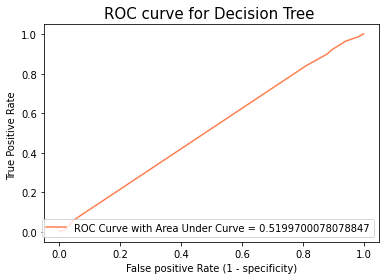

In [180]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Decision Tree ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [181]:
performance_metrics_with_hyperparameters['Decision Tree']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Random Forest

In [182]:
h_params={'n_estimators':[10,20,30,50,100,150,200],
        'criterion':["gini", "entropy"],
        'max_depth':[1,3,5,7,10,15,20,25,30],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60,70,80,90]}

In [183]:
rscv=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [184]:
results.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'max_leaf_nodes': 50,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'gini'}

In [185]:
results.best_score_

0.5713735123109116

## Building Random Forest model with hyperparameters

In [186]:
rf_tuned_model=RandomForestClassifier(n_estimators= 200,
                                     min_samples_split= 10,
                                     max_leaf_nodes=10,
                                     max_features= 'auto',
                                     max_depth=30,
                                     criterion= 'entropy')
rf_tuned_model.fit(x_train,y_train)
y_pred=rf_tuned_model.predict(x_test)
y_pred_proba=rf_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[324, 169],
       [271, 220]], dtype=int64)

In [187]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.66      0.60       493
           1       0.57      0.45      0.50       491

    accuracy                           0.55       984
   macro avg       0.56      0.55      0.55       984
weighted avg       0.56      0.55      0.55       984


Accuracy is :  0.5528455284552846
Precission :  0.5655526992287918
Recall :  0.4480651731160896
f1-score :  0.5
Roc Auc score :  0.552632992237558


In [188]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5771038944407034


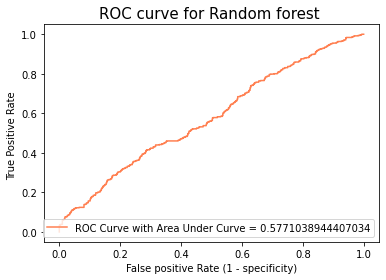

In [189]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Random forest ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [190]:
performance_metrics_with_hyperparameters['Random Forest']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Gradient Boosting

In [191]:
h_params={'n_estimators':[10,20,30,50,70],
        'criterion':['friedman_mse', 'mse', 'mae'],
        'max_depth':[1,3,5,7,10,15,20],
        'min_samples_split':[2,5,10,20,50],
        'max_features':["auto", "sqrt", "log2",None],
        'max_leaf_nodes':[10,20,30,40,50,60]}

In [192]:
rscv=RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [193]:
results.best_params_

{'n_estimators': 70,
 'min_samples_split': 20,
 'max_leaf_nodes': 60,
 'max_features': 'auto',
 'max_depth': 1,
 'criterion': 'friedman_mse'}

In [194]:
results.best_score_

0.5742192475332688

## Building Gradient Boosting model with Hyperparameters

In [195]:
gd_tuned_model=GradientBoostingClassifier(n_estimators= 10,
                                             min_samples_split= 50,
                                             max_leaf_nodes= 20,
                                             max_features= None,
                                             max_depth= 10,
                                             criterion= 'friedman_mse')
gd_tuned_model.fit(x_train,y_train)
y_pred=gd_tuned_model.predict(x_test)
y_pred_proba=gd_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[338, 155],
       [262, 229]], dtype=int64)

In [196]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62       493
           1       0.60      0.47      0.52       491

    accuracy                           0.58       984
   macro avg       0.58      0.58      0.57       984
weighted avg       0.58      0.58      0.57       984


Accuracy is :  0.5762195121951219
Precission :  0.5963541666666666
Recall :  0.4663951120162933
f1-score :  0.5234285714285715
Roc Auc score :  0.5759967446491202


In [197]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5921474987916369


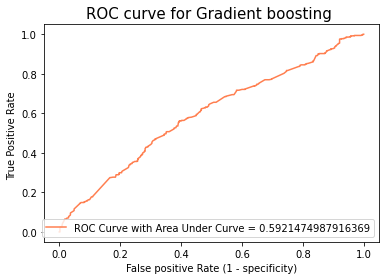

In [198]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient boosting ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [199]:
performance_metrics_with_hyperparameters['Gradient boosting']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Adaboosting

In [200]:
h_params={'n_estimators':[10,20,30,50,70],
        'learning_rate':[0.01,0.05,0.1,0.2,0.5,1,2,5],
        'algorithm' : ['SAMME', 'SAMME.R']}

In [201]:
rscv=RandomizedSearchCV(estimator=AdaBoostClassifier(),param_distributions=h_params,scoring='accuracy',cv=5,random_state=1)
results=rscv.fit(predictor,response)

In [202]:
results.best_params_

{'n_estimators': 50, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

In [203]:
results.best_score_

0.5758454705605042

## Building Adaboost model with Hyperparameters

In [204]:
ada_tuned_model=AdaBoostClassifier(n_estimators= 50, learning_rate= 0.1, algorithm= 'SAMME.R')
ada_tuned_model.fit(x_train,y_train)
y_pred=ada_tuned_model.predict(x_test)
y_pred_proba=ada_tuned_model.predict_proba(x_test)[:,1]



confusion_matrix(y_test,y_pred)

array([[378, 115],
       [310, 181]], dtype=int64)

In [205]:
print(classification_report(y_test,y_pred))
print()
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precission : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1-score : ',f1_score(y_test,y_pred))
print('Roc Auc score : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.77      0.64       493
           1       0.61      0.37      0.46       491

    accuracy                           0.57       984
   macro avg       0.58      0.57      0.55       984
weighted avg       0.58      0.57      0.55       984


Accuracy is :  0.568089430894309
Precission :  0.6114864864864865
Recall :  0.36863543788187375
f1-score :  0.4599745870393901
Roc Auc score :  0.5676848589003689


In [206]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Area under the ROC curve : ',auc(fpr, tpr))

Area under the ROC curve :  0.5959998017045149


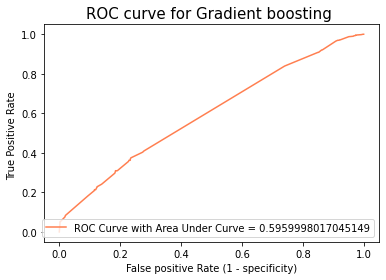

In [207]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve = '+str(auc (fpr, tpr)))
plt.title('ROC curve for Gradient boosting ',fontsize=15)
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.show()

In [208]:
performance_metrics_with_hyperparameters['Gradient boosting']=[accuracy_score(y_test,y_pred),
                                                                    precision_score(y_test,y_pred),
                                                                    recall_score(y_test,y_pred),
                                                                    f1_score(y_test,y_pred),
                                                                    auc(fpr, tpr)]

# Performance metrics with hyperparameters

In [209]:
performance_metrics_with_hyperparameters

,Logistic Regression,SVM,KNN,Decision Tree,Random Forest,Gradient boosting
Accuracy,0.567073,0.573171,0.531504,0.509146,0.552846,0.568089
Precision,0.571429,0.609907,0.530364,0.504566,0.565553,0.611486
Recall,0.529532,0.401222,0.533605,0.900204,0.448065,0.368635
F1_score,0.549683,0.484029,0.531980,0.646672,0.500000,0.459975
AUC,0.602335,0.581770,0.531168,0.519970,0.577104,0.596000
